# Cleanning Data

# First Inspection / Handling inconsistent Data

In [27]:
import pandas as pd

In [28]:
titanic = pd.read_csv("titanic_imp.csv")

In [29]:
titanic.head()

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,1,female,38.0,1,0,$71.2833,C,C
2,2,1,3,female,26.0,0,0,$7.925,S,NaN
3,3,1,1,female,35.0,1,0,$53.1,S,C
4,4,0,3,male,35.0,0,0,$8.05,S,NaN


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  894 non-null    int64 
 1   Survived    894 non-null    object
 2   Class       894 non-null    int64 
 3   Gender      894 non-null    object
 4   Age         758 non-null    object
 5   SipSp       894 non-null    int64 
 6   ParCh       894 non-null    int64 
 7   Fare        894 non-null    object
 8   Emb         892 non-null    object
 9   Deck        203 non-null    object
dtypes: int64(4), object(6)
memory usage: 70.0+ KB


In [31]:
titanic[["Survived", "Gender", "Age", "Fare", "Emb", "Deck"]].describe()

,Survived,Gender,Age,Fare,Emb,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


In [32]:
titanic.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [33]:
titanic.Survived.value_counts()

Survived
0      551
1      341
yes      1
no       1
Name: count, dtype: int64

In [34]:
titanic.Survived.replace(to_replace=["yes", "no"], value = [1,0], inplace=True)

In [35]:
titanic.Survived.value_counts()

Survived
0    551
1    341
1      1
0      1
Name: count, dtype: int64

In [36]:
summer = pd.read_csv("summer_imp.csv")

In [37]:
summer

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31165,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31166,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31167,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31168,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [38]:
summer.rename(columns= {"Athlete Name": "Athlete_Name"}, inplace= True)

In [39]:
summer.Medal.replace(to_replace= "Gold Medal", value= "Gold", inplace= True)

In [40]:
summer.iloc[:, 1:].describe()

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22763,147,2,666,3
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10487


# String Operation

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  894 non-null    int64 
 1   Survived    894 non-null    object
 2   Class       894 non-null    int64 
 3   Gender      894 non-null    object
 4   Age         758 non-null    object
 5   SipSp       894 non-null    int64 
 6   ParCh       894 non-null    int64 
 7   Fare        894 non-null    object
 8   Emb         892 non-null    object
 9   Deck        203 non-null    object
dtypes: int64(4), object(6)
memory usage: 70.0+ KB


In [42]:
pd.to_numeric(titanic.Fare)

ValueError: Unable to parse string "$7.25" at position 0

In [43]:
titanic.Fare = titanic.Fare.str.replace("$", "")

In [44]:
titanic.Fare

0         7.25
1      71.2833
2        7.925
3         53.1
4         8.05
        ...   
889       30.0
890       7.75
891       10.5
892       14.4
893     7.8958
Name: Fare, Length: 894, dtype: object

In [45]:
summer.head(20)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold


In [46]:
summer.Athlete_Name = summer.Athlete_Name.str.title()

In [47]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [48]:
summer.iloc[0,4]

' Hajos, Alfred '

In [49]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()

In [50]:
summer.iloc[0,4]

'Hajos, Alfred'

# Changing DataType with astype()/ pd.to_numeric

In [51]:
titanic.head()

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,1,female,38.0,1,0,71.2833,C,C
2,2,1,3,female,26.0,0,0,7.925,S,NaN
3,3,1,1,female,35.0,1,0,53.1,S,C
4,4,0,3,male,35.0,0,0,8.05,S,NaN


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  894 non-null    int64 
 1   Survived    894 non-null    object
 2   Class       894 non-null    int64 
 3   Gender      894 non-null    object
 4   Age         758 non-null    object
 5   SipSp       894 non-null    int64 
 6   ParCh       894 non-null    int64 
 7   Fare        894 non-null    object
 8   Emb         892 non-null    object
 9   Deck        203 non-null    object
dtypes: int64(4), object(6)
memory usage: 70.0+ KB


In [53]:
pd.to_numeric(titanic.Fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [54]:
titanic.Fare.astype("float")

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [55]:
titanic.Fare = titanic.Fare.astype("float")

In [56]:
titanic.Survived = titanic.Survived.astype("int")

In [57]:
titanic.Age.unique()

array(['22.0', '38.0', '26.0', '35.0', 'Missing Data', '54.0', '2.0',
       '27.0', '14.0', '4.0', '58.0', '20.0', '39.0', '55.0', '31.0',
       '34.0', '15.0', '28.0', '8.0', '19.0', '40.0', '66.0', '42.0',
       '21.0', '18.0', '3.0', '7.0', '49.0', '29.0', '65.0', '28.5',
       '5.0', '11.0', '45.0', '17.0', '32.0', '16.0', '25.0', '0.83',
       '30.0', '33.0', '23.0', '24.0', '46.0', '59.0', '71.0', '37.0',
       '47.0', '14.5', '70.5', '32.5', '12.0', '9.0', '36.5', '51.0',
       '55.5', '40.5', '44.0', '1.0', '61.0', '56.0', '50.0', '36.0', nan,
       '45.5', '102', '20.5', '62.0', '41.0', '52.0', '63.0', '23.5',
       '0.92', '43.0', '60.0', '10.0', '64.0', '13.0', '490', '48.0',
       '0.75', '53.0', '57.0', '80.0', '70.0', '24.5', '6.0', '0.67',
       '30.5', '250', '0.42', '34.5', '74.0'], dtype=object)

# Intro to NA Values

In [58]:
import numpy as np

In [59]:
sales = pd.read_csv("sales.csv", index_col= 0)

In [60]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [61]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [62]:
sales.loc["Steven", "Thu"]

nan

In [63]:
sales.iloc[1,1] = np.nan

In [64]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15,NaN,33
Mike,45,NaN,74,87.0,12
Andi,17,33.0,54,8.0,29
Paul,87,67.0,27,45.0,7


# Detecting Missing Values

In [65]:
titanic.head()

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,1,female,38.0,1,0,71.2833,C,C
2,2,1,3,female,26.0,0,0,7.9250,S,NaN
3,3,1,1,female,35.0,1,0,53.1000,S,C
4,4,0,3,male,35.0,0,0,8.0500,S,NaN


In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  894 non-null    int64  
 1   Survived    894 non-null    int64  
 2   Class       894 non-null    int64  
 3   Gender      894 non-null    object 
 4   Age         758 non-null    object 
 5   SipSp       894 non-null    int64  
 6   ParCh       894 non-null    int64  
 7   Fare        894 non-null    float64
 8   Emb         892 non-null    object 
 9   Deck        203 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 70.0+ KB


In [67]:
titanic.isna()

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,False,True


In [68]:
titanic.isna().sum(axis=1) # 0 for column, 1 for row (sum of column/row)

0      1
1      0
2      1
3      0
4      1
      ..
889    0
890    1
891    1
892    1
893    1
Length: 894, dtype: int64

In [69]:
titanic.isna().any(axis= 0)

Unnamed: 0    False
Survived      False
Class         False
Gender        False
Age            True
SipSp         False
ParCh         False
Fare          False
Emb            True
Deck           True
dtype: bool

In [70]:
titanic.notna()

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...
889,True,True,True,True,True,True,True,True,True,True
890,True,True,True,True,True,True,True,True,True,False
891,True,True,True,True,True,True,True,True,True,False
892,True,True,True,True,True,True,True,True,True,False


In [71]:
titanic.notna().all(axis = 0)

Unnamed: 0     True
Survived       True
Class          True
Gender         True
Age           False
SipSp          True
ParCh          True
Fare           True
Emb           False
Deck          False
dtype: bool

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

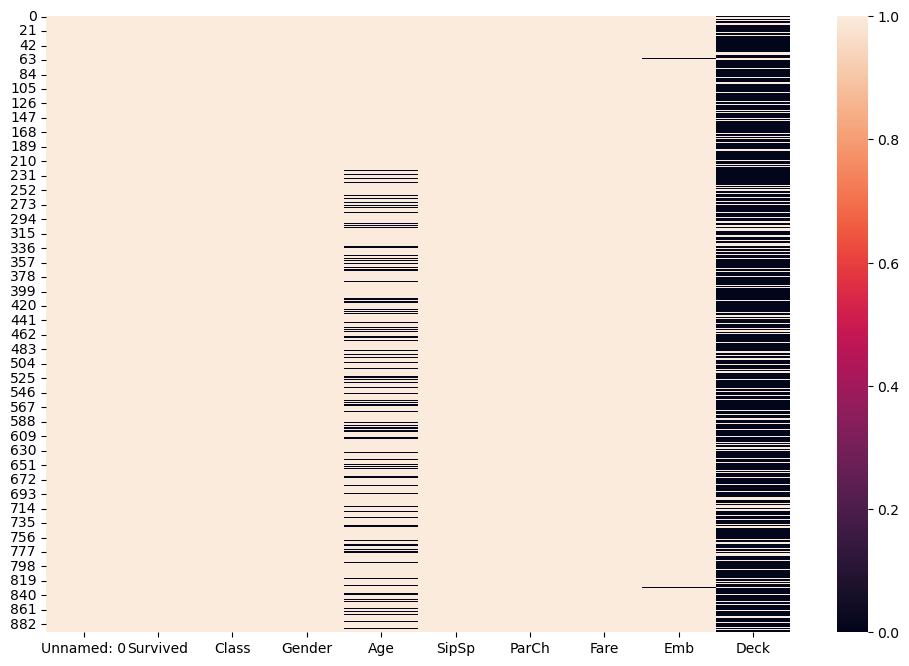

In [73]:
plt.figure(figsize= (12,8))
sns.heatmap(titanic.notna())
plt.show()

In [74]:
titanic.Age.value_counts(dropna = False)

Age
NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
55.5              1
66.0              1
0.92              1
23.5              1
74.0              1
Name: count, Length: 93, dtype: int64

In [75]:
titanic.Age.replace(to_replace= "Missing Data", value = np.nan, inplace= True)

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  894 non-null    int64  
 1   Survived    894 non-null    int64  
 2   Class       894 non-null    int64  
 3   Gender      894 non-null    object 
 4   Age         717 non-null    object 
 5   SipSp       894 non-null    int64  
 6   ParCh       894 non-null    int64  
 7   Fare        894 non-null    float64
 8   Emb         892 non-null    object 
 9   Deck        203 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 70.0+ KB


In [77]:
titanic.Age = titanic.Age.astype("float")

# Detecting Missing Values with dropna()

In [78]:
#titanic dataset

In [79]:
titanic

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,1,female,38.0,1,0,71.2833,C,C
2,2,1,3,female,26.0,0,0,7.9250,S,NaN
3,3,1,1,female,35.0,1,0,53.1000,S,C
4,4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...,...
889,889,1,1,male,26.0,0,0,30.0000,C,C
890,890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,891,0,2,male,24.0,0,0,10.5000,S,NaN
892,892,0,3,male,34.0,1,1,14.4000,S,NaN


In [80]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  894 non-null    int64  
 1   Survived    894 non-null    int64  
 2   Class       894 non-null    int64  
 3   Gender      894 non-null    object 
 4   Age         717 non-null    float64
 5   SipSp       894 non-null    int64  
 6   ParCh       894 non-null    int64  
 7   Fare        894 non-null    float64
 8   Emb         892 non-null    object 
 9   Deck        203 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 70.0+ KB


In [81]:
titanic[titanic.Emb.isna()]

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
61,61,1,1,female,38.0,0,0,80.0,NaN,B
829,829,1,1,female,62.0,0,0,80.0,NaN,B


In [82]:
titanic.Age.value_counts(dropna=False)

Age
NaN      177
24.00     31
22.00     27
18.00     26
28.00     25
        ... 
55.50      1
66.00      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 92, dtype: int64

In [83]:
titanic.Age.mean(skipna= True)

30.718507670850766

In [84]:
titanic.shape

(894, 10)

In [85]:
titanic.dropna().shape

(182, 10)

In [86]:
titanic.dropna(axis = 1, thresh= 500, inplace= True)

In [87]:
titanic.shape

(894, 9)

In [88]:
#Olympic

In [89]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [90]:
summer[summer.isna().any(axis = 1)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


In [91]:
summer.dropna(inplace= True)

In [92]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


# Replacing Missing Values with fillna()

In [93]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  894 non-null    int64  
 1   Survived    894 non-null    int64  
 2   Class       894 non-null    int64  
 3   Gender      894 non-null    object 
 4   Age         717 non-null    float64
 5   SipSp       894 non-null    int64  
 6   ParCh       894 non-null    int64  
 7   Fare        894 non-null    float64
 8   Emb         892 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 63.0+ KB


In [94]:
titanic.Age.mean()

30.718507670850766

In [95]:
mean = round(titanic.Age.mean(), 1)
mean

30.7

In [96]:
titanic.Age.fillna(mean, inplace = True)

# Dectecting of Duplicates

In [97]:
alphabet = pd.DataFrame(["a", "b","c","d","c","a"], columns= ["Alphabet"])

In [98]:
alphabet

,Alphabet
0,a
1,b
2,c
3,d
4,c
5,a


In [99]:
alphabet.duplicated(keep = False)

0     True
1    False
2     True
3    False
4     True
5     True
dtype: bool

In [100]:
alphabet[alphabet.duplicated(keep = False)]

,Alphabet
0,a
2,c
4,c
5,a


In [101]:
#Titanic DataSet

In [102]:
titanic.head()

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


In [103]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  894 non-null    int64  
 1   Survived    894 non-null    int64  
 2   Class       894 non-null    int64  
 3   Gender      894 non-null    object 
 4   Age         894 non-null    float64
 5   SipSp       894 non-null    int64  
 6   ParCh       894 non-null    int64  
 7   Fare        894 non-null    float64
 8   Emb         892 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 63.0+ KB


In [123]:
titanic.duplicated(keep = "first", subset = ["Survived", "Class"]).sum()

887

In [124]:
titanic[titanic.duplicated(keep = "first", subset = ["Survived", "Class"])]

,Unnamed: 0,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
3,3,1,1,female,35.0,1,0,53.1000,S
5,5,0,3,male,30.7,0,0,8.4583,Q
7,7,0,3,male,2.0,3,1,21.0750,S
8,8,1,3,female,27.0,0,2,11.1333,S
10,10,1,3,female,4.0,1,1,16.7000,S
...,...,...,...,...,...,...,...,...,...
889,889,1,1,male,26.0,0,0,30.0000,C
890,890,0,3,male,32.0,0,0,7.7500,Q
891,891,0,2,male,24.0,0,0,10.5000,S
892,892,0,3,male,34.0,1,1,14.4000,S


In [128]:
titanic.drop("Unnamed: 0", axis= 1, inplace= True)

# Handling/Removing Duplicates

In [125]:
#Titanic Set

In [129]:
titanic.duplicated().sum()

114

In [130]:
titanic[titanic.duplicated()]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
47,1,3,female,30.7,0,0,7.7500,Q
76,0,3,male,30.7,0,0,7.8958,S
77,0,3,male,30.7,0,0,8.0500,S
87,0,3,male,30.7,0,0,8.0500,S
95,0,3,male,30.7,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


In [131]:
titanic.drop(index = [891,892,893], inplace= True)

In [132]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q


In [133]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 1 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Class     890 non-null    int64  
 2   Gender    890 non-null    object 
 3   Age       890 non-null    float64
 4   SipSp     890 non-null    int64  
 5   ParCh     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Emb       888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Detection of Outliers

In [134]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q


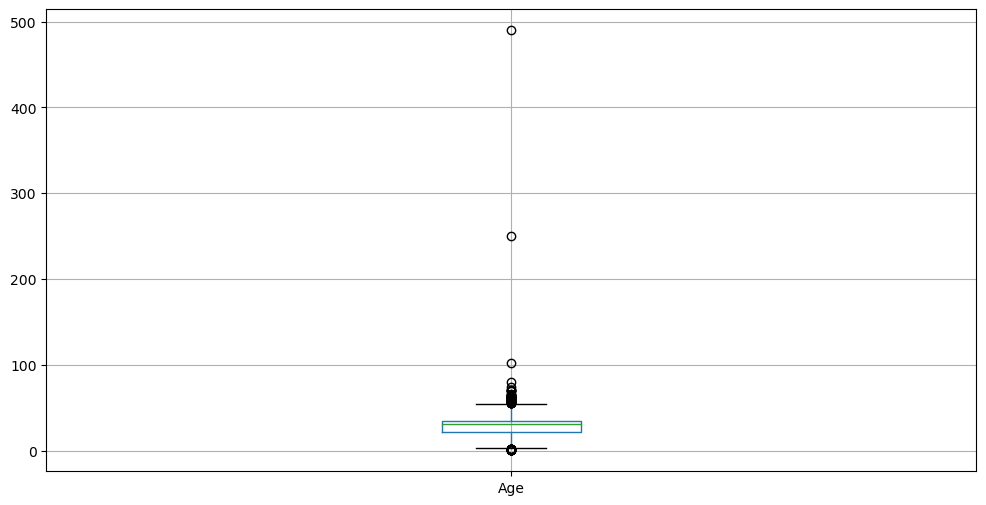

In [135]:
plt.figure(figsize= (12,6))
titanic.boxplot("Age")
plt.show()

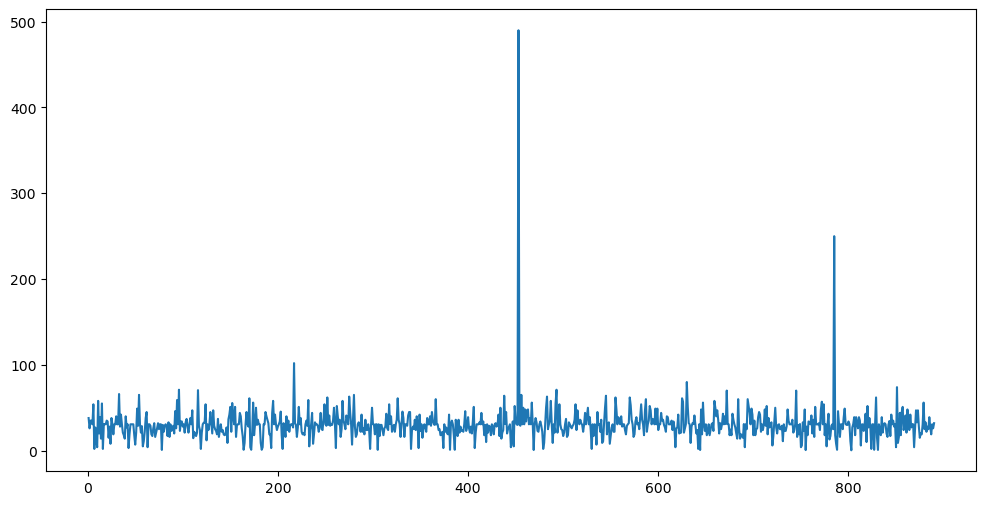

In [137]:
plt.figure(figsize= (12,6))
titanic.Age.plot()
plt.show()

In [139]:
titanic.Age.sort_values(ascending= False)

453    490.00
785    250.00
217    102.00
630     80.00
851     74.00
        ...  
78       0.83
644      0.75
469      0.75
755      0.67
803      0.42
Name: Age, Length: 890, dtype: float64

In [147]:
titanic.loc[titanic.Age > 90]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [144]:
index_outl = titanic.loc[titanic.Age > 90].index

index_outl

Index([217, 453, 785], dtype='int64')

In [148]:
titanic.loc[titanic.Age > 90, "Age"] = titanic.loc[titanic.Age > 90, "Age"]/10

In [149]:
titanic.loc[index_outl]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,10.2,1,0,27.0000,S
453,1,1,male,49.0,1,0,89.1042,C
785,0,3,male,25.0,0,0,7.2500,S


In [150]:
titanic.loc[217,"Age"] = 42

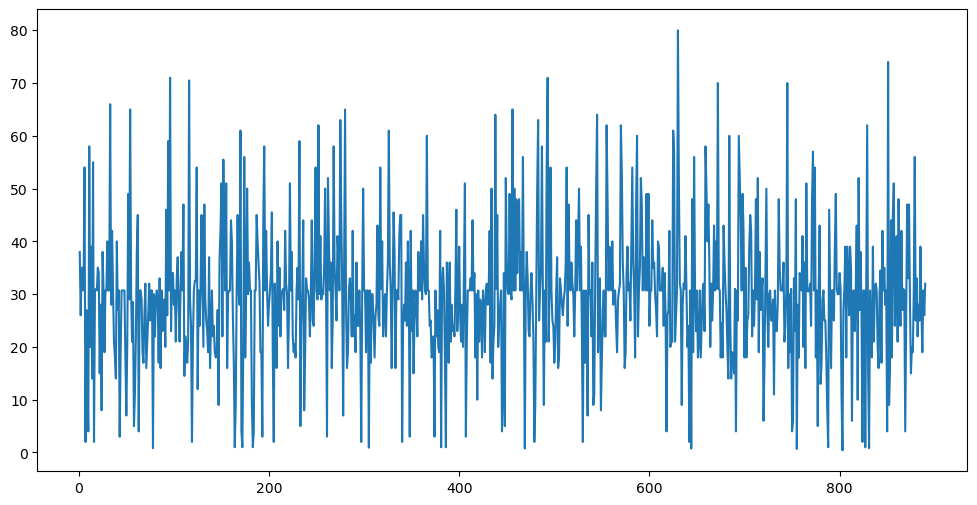

In [151]:
plt.figure(figsize= (12,6))
titanic.Age.plot()
plt.show()